In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
# %pwd

## 데이터 전처리

In [57]:
# os.listdir('./국내외국인/')

In [4]:
stayType = pd.read_csv("./국내외국인/국적_지역_및_체류자격별_체류외국인_현황_2013~2019.csv", 
                       encoding='euc-kr')
stayType.head()

,국적(지역)별(1),성별(1),2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2019.28,2019.29,2019.30,2019.31,2019.32,2019.33,2019.34,2019.35,2019.36,2019.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,1576034,1649,970,47890,87908,27,131951,460,...,43671,22890,464152,153291,131034,36507,3136,226322,2637,58911
2,총계,남자,870176,862,592,24280,41663,20,69339,339,...,19310,8266,222007,69780,24248,27515,554,136533,1100,42885
3,총계,여자,705858,787,378,23610,46245,7,62612,121,...,24361,14624,242145,83511,106786,8992,2582,89789,1537,16026
4,총계,제3의성,-,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 국적 구분 제거 
# stayType = stayType.drop(columns=stayType.columns[0])

In [6]:
# DF 형태 변경 -> 연도가 하나의 column이 되도록. 
# 출신 국가 제외하고 총계만
stayTotal = stayType.T.iloc[1:,:5].reset_index()

# reset header
stayTotal = stayTotal.iloc[1:]
stayTotal.columns = ['year_raw','stay_type','SUM','M','F','other']

# 조사년도 추가
stayTotal['year'] = stayTotal['year_raw'].apply(lambda x: x[:4])
stayTotal = stayTotal.drop(columns='year_raw')

# '-' 값 -> nullfull
stayTotal = stayTotal.replace('-', np.nan)
stayTotal

,stay_type,SUM,M,F,other,year
1,합계,1576034,870176,705858,NaN,2013
2,외교(A-1),1649,862,787,NaN,2013
3,공무(A-2),970,592,378,NaN,2013
4,사증면제(B-1),47890,24280,23610,NaN,2013
5,관광통과(B-2),87908,41663,46245,NaN,2013
...,...,...,...,...,...,...
263,기타(G-1),36507,27515,8992,0,2019
264,관광취업(H-1),3136,554,2582,0,2019
265,방문취업(H-2),226322,136533,89789,0,2019
266,관광상륙(T-1),2637,1100,1537,0,2019


In [7]:
stayTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 1 to 267
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stay_type  267 non-null    object
 1   SUM        267 non-null    object
 2   M          267 non-null    object
 3   F          267 non-null    object
 4   other      38 non-null     object
 5   year       267 non-null    object
dtypes: object(6)
memory usage: 12.6+ KB


## 체류 유형별(=입국 목적별) 외국인 체류자 집계

In [8]:
import datetime

# change data type
stayTotal = stayTotal.astype({'stay_type':str,
                             'SUM':int,
                             'M':int,
                             'F':int,
                             'other':int},
                            errors='ignore')

In [9]:
from matplotlib import font_manager, rc

# font_list = font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')
# print(font_list)
font_name = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)


<AxesSubplot:>

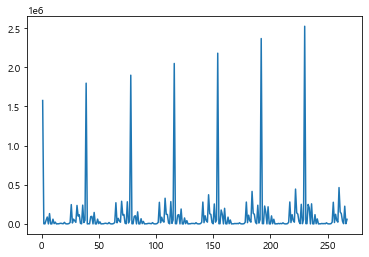

In [10]:
stayTotal['SUM'].plot()

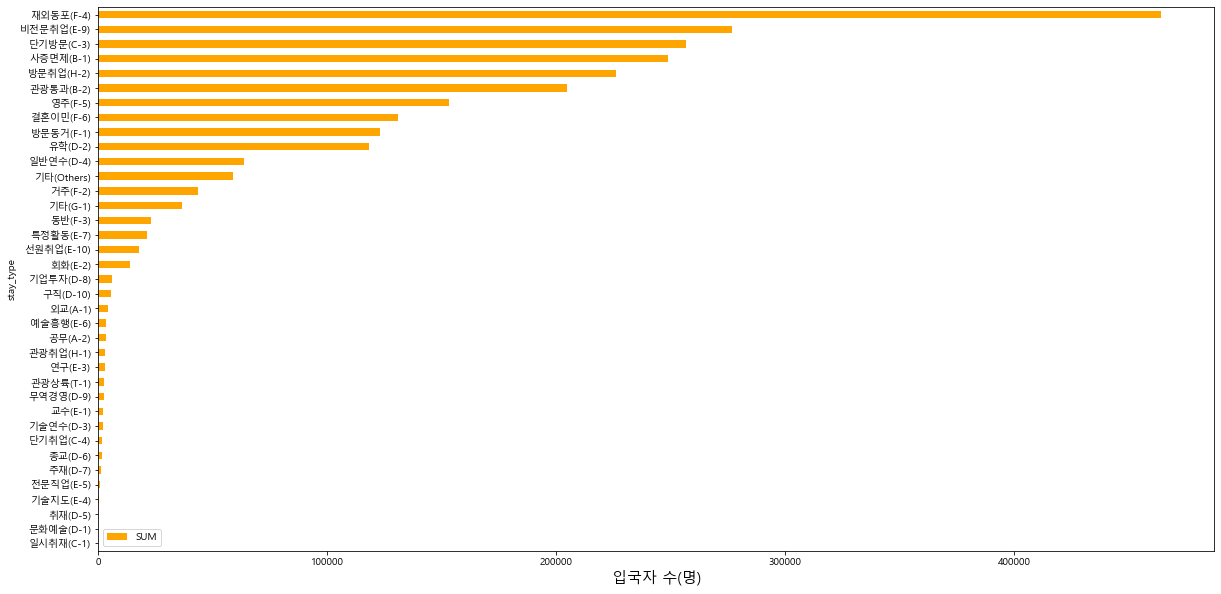

In [11]:
stayTotal[stayTotal.year == '2019'][1:].sort_values(by='SUM', ascending=True).plot(x='stay_type',y='SUM',kind='barh',figsize=(20,10), sort_columns=True, color='orange')
plt.xlabel('입국자 수(명)', fontsize=15)
plt.savefig(fname='./국내외국인/foreigner_all_stay_2019.png', bbox_inches='tight')

재외동포가 제일 많다. 재외동포는 누구지? 외국인 통계에 들어있는 거면 이미 한국 국적을 가지고 있지 않다는 뜻일텐데 누구를 재외동포라고 부르나?
<br>라고 생각했지만 법률 상 한국 국적을 가지고 있는데도 재외동포라 불리는 사람들이 있었다.

**외동포의 출입국과 법적 지위에 관한 법률 제2조**
1. 대한민국의 국민으로서 외국의 영주권(永住權)을 취득한 자 또는 영주할 목적으로 외국에 거주하고 있는 자(이하 “재외국민”이라 한다)
2. 대한민국의 국적을 보유하였던 자(대한민국정부 수립 전에 국외로 이주한 동포를 포함한다) 또는 그 직계비속(直系卑屬)으로서 외국국적을 취득한 자 중 대통령령으로 정하는 자(이하 “외국국적동포”라 한다)

즉 재외동포도 한국 국적을 가지고 있는 사람/국적을 보유했으나 현재는 아닌 사람/국적을 보유한 적이 없어도 국적을 보유했던 사람의 직계비속이고 대통령령으로 정해진 사람 이 포함된다는 거지.
<br> 그럼 이 사람들을 외국인으로 보는 게 맞을까? 그리고, 나는 체류 유형 == '한국에 온 이유'라고 보려고 했는데, 재외동포는 분류일 뿐 한국에 온 목적을 담고 있지는 않다. 재외동포도 취업을 위해 한국에 오거나, 영주를 위해 오거나 등등 이유가 있어 왔을텐데, 재외동포를 유형의 하나로 넣어버림으로 해서 오히려 통계를 흐리게 만드는 것 같다.

그럼 나는 글에서 재외동포를 포함시킬 것인가 아니면 제외할 것인가? 
<br>심지어 재외동포의 정의에 따르면 이들 중 '외국인'의 정의(대한민국의 국적을 가지지 않은 사람)에 포함되는 사람과 그렇지 않은 사람이 혼재한다.
<br>그러면 재외동포 중 몇 명이 법률상 외국인이고, 몇 명이 외국인은 아닌지에 대해 발라낼 도리가 없다. 
<br>=> 외국인의 정의에 맞는 사람만 구분할 수 없고, 그들의 체류 목적(거주, 단기)을 알 수 없기 때문에 재외동포는 외국인 통계 잡을 땐 빼야겠다.

**그럼 재외동포를 제외하고 가장 많은 경우는?**

비전문 취업 > 단기 방문 > 사증면제 > 방문취업 > 관광통과 > 영주 > 결혼이민 > 방문동거 > 유학 > 일반연수 순이다. 
<br> TOP10을 큰 카테고리에서 보면 취업, 관광, 이민, 교육 등으로 나뉜다. 

**사증면제는 뭐지?**
<br> => 사증==visa==입국허가. 기본적으로 해외에 가려면 비자가 필요하지만 한국과 사증면제협정을 맺은 국가들이 있고, 그 나라에 갈 때는 비자를 따로 발급받지 않고 협정에서 정한 기간(대부분 90일) 동안 체류할 수 있는 것. 근데 사증면제협정이 항상 양쪽 나라에 동일하게 적용되는 건 아니고, 상호/일방의 경우가 존재한다.

국내 체류 유형이 '사증면제'라는 건 협정을 맺은 나라에서 왔다는 것. 그리고 무사증으로 한국에 입국해도 가능한 체류기간은 일반여권 기준 대부분 90일이고 많아야 6개월 이내.
<br>=> 질문의 초점을 조금 더 국내에서 오래, 우리 곁에서 살아가는 사람들에 맞춘다면 사증면제로 단기 입국한 경우는 역시 제외하는 것이 나을까?

In [12]:
stayTotal.head()

,stay_type,SUM,M,F,other,year
1,합계,1576034,870176,705858,NaN,2013
2,외교(A-1),1649,862,787,NaN,2013
3,공무(A-2),970,592,378,NaN,2013
4,사증면제(B-1),47890,24280,23610,NaN,2013
5,관광통과(B-2),87908,41663,46245,NaN,2013


In [13]:
# plt.figure(figsize=(15,8))
# plt.bar(x=stayTotal['stay_type'],
#        height=stayTotal[stayTotal['year']=='2019']['SUM'])

# plt.xticks(rotation=45)
# plt.xlabel('체류 유형')
# plt.ylabel('명')
# plt.show()

### 단기 체류나 체류 목적을 알 수 없는 경우를 제외한 경우만 

In [14]:
stayTotal.stay_type.unique()

array(['합계', '외교(A-1)', '공무(A-2)', '사증면제(B-1)', '관광통과(B-2)', '일시취재(C-1)',
       '단기방문(C-3)', '단기취업(C-4)', '문화예술(D-1)', '유학(D-2)', '기술연수(D-3)',
       '일반연수(D-4)', '취재(D-5)', '종교(D-6)', '주재(D-7)', '기업투자(D-8)',
       '무역경영(D-9)', '구직(D-10)', '교수(E-1)', '회화(E-2)', '연구(E-3)',
       '기술지도(E-4)', '전문직업(E-5)', '예술흥행(E-6)', '특정활동(E-7)', '비전문취업(E-9)',
       '선원취업(E-10)', '방문동거(F-1)', '거주(F-2)', '동반(F-3)', '재외동포(F-4)',
       '영주(F-5)', '결혼이민(F-6)', '기타(G-1)', '관광취업(H-1)', '방문취업(H-2)',
       '관광상륙(T-1)', '기타(Others)', '자격없음(0-0)'], dtype=object)

In [15]:
# annotation example

# df=pd.DataFrame({'A':np.random.rand(2)-1,'B':np.random.rand(2)},index=['val1','val2'] )
# ax = df.plot(kind='bar', color=['r','b']) 
# x_offset = -0.03
# y_offset = 0.02
# for p in ax.patches:
#     b = p.get_bbox()
#     val = "{:+.2f}".format(b.y1 + b.y0)        
#     ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [16]:
import matplotlib.pyplot as plt

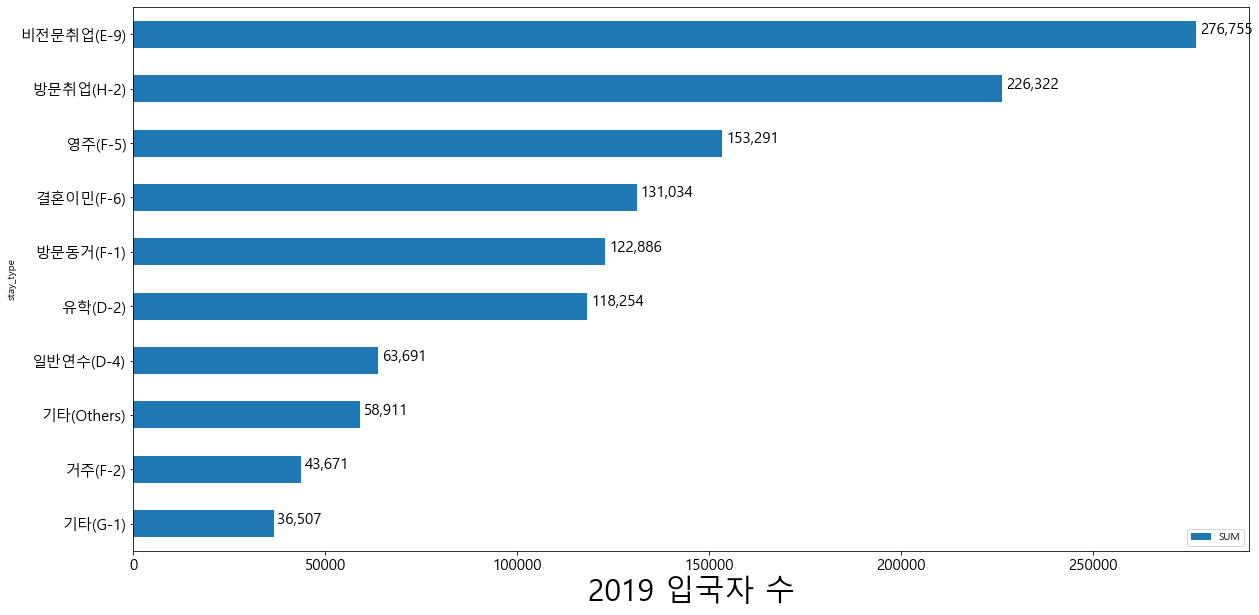

In [17]:
# 단기 체류 목적을 제외한 rank
stayLong = stayTotal[~stayTotal.stay_type.isin(['합계','재외동포(F-4)','사증면제(B-1)','관광통과(B-2)', '일시취재(C-1)','단기방문(C-3)','관광상륙(T-1)'])]

# stayLong[stayLong.year == '2019'].sort_values(by='SUM', ascending=False)
ax = stayLong[stayLong.year == '2019'].sort_values(by='SUM', ascending=False).reset_index()[:10].plot(x='stay_type', y='SUM',kind='barh',figsize=(20,10),fontsize=15)

ax.invert_yaxis()

x_offset = 1000

for p in ax.patches:
    b = p.get_bbox();
    val = "{:,}".format(int(b.x1))
    ax.annotate(val, (b.x1 + x_offset, (b.y0 + b.y1)/2), fontsize=15)
    
plt.xlabel('2019 입국자 수', fontsize=30)
plt.savefig(fname='./국내외국인/foreigner_longterm_stay_2019.png', bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '비전문취업(E-9)'),
  Text(1, 0, '방문취업(H-2)'),
  Text(2, 0, '영주(F-5)'),
  Text(3, 0, '결혼이민(F-6)'),
  Text(4, 0, '방문동거(F-1)'),
  Text(5, 0, '유학(D-2)'),
  Text(6, 0, '일반연수(D-4)'),
  Text(7, 0, '기타(Others)'),
  Text(8, 0, '거주(F-2)'),
  Text(9, 0, '기타(G-1)')])

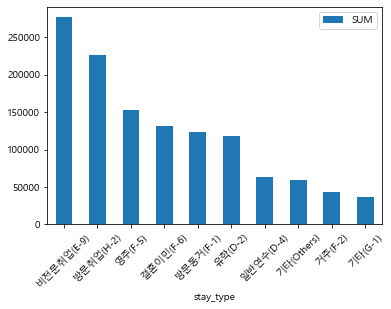

In [18]:
stayLong[stayLong.year == '2019'].sort_values(by='SUM', ascending=False).reset_index()[:10].plot(x='stay_type', y='SUM', kind='bar')
plt.xticks(rotation=45)

### 국적(지역)별로 체류 목적이 달랐을까?

In [19]:
os.listdir("./국내외국인/")

['foreigner_all_stay_2019.png',
 'foreigner_longterm_stay_2019.png',
 '[국가통계포털]국적_지역__및_체류자격별_체류외국인_현황_20210424012627.xlsx',
 '[국가통계포털]시군구별_및_국적_지역_별_등록외국인_현황_20210424013224.xlsx',
 '[나라지표]법무부_체류외국인현황.xls',
 '~$체류유형_출신지역별_입국자_통계.xlsx',
 '고용허가제_고용동향_외국인근로자_수__20210424.csv',
 '고용허가제_고용동향_외국인근로자_수__20210424014335.xlsx',
 '고용허가제_외국인근로자_E9__업종별_도입현황_20210424014142.xlsx',
 '고용허가제_외국인근로자_E9_업종별_도입현황_20210424.csv',
 '국적_지역_및_체류자격별_체류외국인_현황_2013~2019.csv',
 '국적_지역_및_체류자격별_체류외국인_현황_2013~2019_unpivot.csv',
 '국적_지역_체류자격별_체류외국인_현황_20210424.csv',
 '시군구별_및_국적_지역_별_등록외국인_현황_20210424.csv',
 '지방자치단체 외국인주민 현황 주요 변경 내용.hwp',
 '체류유형_출신지역별_입국자_통계.xlsx']

In [22]:
nationTotal = pd.read_csv("./국내외국인/국적_지역_및_체류자격별_체류외국인_현황_2013~2019.csv", 
                       encoding='euc-kr')
# nationLong =nationTotal[~nationTotal.stay_type.isin(['합계','재외동포(F-4)','사증면제(B-1)','관광통과(B-2)', '일시취재(C-1)','단기방문(C-3)','관광상륙(T-1)'])]

nationTotal.head()

,국적(지역)별(1),성별(1),2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2019.28,2019.29,2019.30,2019.31,2019.32,2019.33,2019.34,2019.35,2019.36,2019.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,1576034,1649,970,47890,87908,27,131951,460,...,43671,22890,464152,153291,131034,36507,3136,226322,2637,58911
2,총계,남자,870176,862,592,24280,41663,20,69339,339,...,19310,8266,222007,69780,24248,27515,554,136533,1100,42885
3,총계,여자,705858,787,378,23610,46245,7,62612,121,...,24361,14624,242145,83511,106786,8992,2582,89789,1537,16026
4,총계,제3의성,-,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


연도별로 df 분리

In [23]:
nation_2019 = nationTotal.filter(regex='2019|성별|국적')
nation_2018 = nationTotal.filter(regex='2018|성별|국적')
nation_2017 = nationTotal.filter(regex='2017|성별|국적')
nation_2016 = nationTotal.filter(regex='2016|성별|국적')
nation_2015 = nationTotal.filter(regex='2015|성별|국적')
nation_2014 = nationTotal.filter(regex='2014|성별|국적')
nation_2013 = nationTotal.filter(regex='2013|성별|국적')


display(nation_2019.head())
display(nation_2013.head())

,국적(지역)별(1),성별(1),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2019.28,2019.29,2019.30,2019.31,2019.32,2019.33,2019.34,2019.35,2019.36,2019.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,2524656,4068,3483,248753,204541,38,256696,1645,...,43671,22890,464152,153291,131034,36507,3136,226322,2637,58911
2,총계,남자,1346134,2102,2090,119898,88079,31,134278,1233,...,19310,8266,222007,69780,24248,27515,554,136533,1100,42885
3,총계,여자,1178521,1966,1393,128855,116461,7,122418,412,...,24361,14624,242145,83511,106786,8992,2582,89789,1537,16026
4,총계,제3의성,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,국적(지역)별(1),성별(1),2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2013.28,2013.29,2013.30,2013.31,2013.32,2013.33,2013.34,2013.35,2013.36,2013.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,1576034,1649,970,47890,87908,27,131951,460,...,39704,20150,235953,100171,117007,7003,1550,240178,17643,46972
2,총계,남자,870176,862,592,24280,41663,20,69339,339,...,13506,6398,117374,45235,17985,5353,273,136342,7112,33952
3,총계,여자,705858,787,378,23610,46245,7,62612,121,...,26198,13752,118579,54936,99022,1650,1277,103836,10531,13020
4,총계,제3의성,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


header를 체류 유형으로 바꿔야겠다

In [191]:
# df_list = [nation_2019,nation_2018,nation_2017,nation_2016,nation_2015,nation_2014,nation_2013]

# for idx in range(len(df_list)):
# #     display(df_list[idx])
#     new_header = df_list[idx].iloc[0]
#     df_list[idx] = df_list[idx].iloc[1:] # 1행 drop
#     df_list[idx].columns = new_header # 1행을 헤더로 만들고
        
# nation_2018

In [24]:
# 2019년에 대해 header를 연도 -> 체류 유형으로 변경

new_header = nation_2019.iloc[0]
nation_2019 = nation_2019.iloc[1:] # 1행 drop
nation_2019.columns = new_header # 1행을 헤더로 만들고

In [25]:
nation_2019.head(8)

,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,2524656,4068,3483,248753,204541,38,256696,1645,...,43671,22890,464152,153291,131034,36507,3136,226322,2637,58911
2,총계,남자,1346134,2102,2090,119898,88079,31,134278,1233,...,19310,8266,222007,69780,24248,27515,554,136533,1100,42885
3,총계,여자,1178521,1966,1393,128855,116461,7,122418,412,...,24361,14624,242145,83511,106786,8992,2582,89789,1537,16026
4,총계,제3의성,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,아시아주계,계,2193440,1836,1889,211993,153398,34,252960,1149,...,41298,16993,366199,149330,120875,25198,1862,224626,2589,2465
6,아시아주계,남자,1159832,936,1143,98346,61703,27,131458,918,...,17956,6060,176431,67306,17952,18637,166,135552,1082,1164
7,아시아주계,여자,1033608,900,746,113647,91695,7,121502,231,...,23342,10933,189768,82024,102923,6561,1696,89074,1507,1301
8,북아메리카주계,계,183771,482,535,671,40487,3,203,61,...,857,1842,61175,1746,4257,16,95,0,17,55571


이걸 어쩌지. 인덱스랑 헤더가 4개나 뭉쳐있네. 계/남/녀/제3의성 이니까 4개씩 끊어갈까 했더니 제3의 성이 없는 경우도 있네
<br> => Unpivot 해서 다 풀어놔야지. 로데이터도 제공했으면 좋겠다

In [26]:
unpivot_2019 = nation_2019.melt(id_vars=nation_2019.columns[:2])
unpivot_2019.columns = ['loc','gender','stay_type','value']
unpivot_2019.tail()

,loc,gender,stay_type,value
983,아프리카주계,남자,기타(Others),341
984,아프리카주계,여자,기타(Others),132
985,기타계,계,기타(Others),8
986,기타계,남자,기타(Others),5
987,기타계,여자,기타(Others),3


In [27]:
# print(unpivot_2019['loc'].unique())
# tmp_2019 = unpivot_2019[(unpivot_2019['loc']=='아시아주계') & (unpivot_2019['gender']=='계')]
# tmp_2019.sort_values(by='value', ascending=False, inplace=True)
# tmp_2019

왜 값이 정렬이 안될까 했는데.. 집계값이 숫자가 아니라 문자열로 들어있었지 -> 실수가 아닌데 숫자가 쏘팅이 안된다?(문자열이니까 100 < 20 이런 순서로 쏘팅됐겠지) 숫자인지 확인할 것


In [28]:
unpivot_2019['value'] = unpivot_2019['value'].astype(int)

#### 출신 지역별 단기 체류를 제외한 입국자 집계

In [29]:
# 국적별 총계 비율
unpivot_2019[(unpivot_2019['gender']=='계') & (unpivot_2019['stay_type']=='합계')]

,loc,gender,stay_type,value
0,총계,계,합계,2524656
4,아시아주계,계,합계,2193440
7,북아메리카주계,계,합계,183771
10,남아메리카주계,계,합계,7685
13,유럽주계,계,합계,97906
16,오세아니아주계,계,합계,20880
20,아프리카주계,계,합계,20671
23,기타계,계,합계,303


In [30]:
# 일단 단기 체류자 

In [31]:
exclude_types = ['합계','재외동포(F-4)','사증면제(B-1)','관광통과(B-2)', '일시취재(C-1)','단기방문(C-3)','관광상륙(T-1)']

print(unpivot_2019['loc'].unique())

for local in unpivot_2019['loc'].unique():
    # 지역별, 
#     display(unpivot_2019[(unpivot_2019['loc']==local) & (unpivot_2019['gender']=='계')].sort_values(by='value', ascending=False)[:5])
    # 지역별, 단기 제외
    display(unpivot_2019[(unpivot_2019['loc']==local) & (unpivot_2019['gender']=='계') & \
             (~unpivot_2019['stay_type'].isin(exclude_types))].sort_values(by='value', ascending=False)[:5])


['총계' '아시아주계' '북아메리카주계' '남아메리카주계' '유럽주계' '오세아니아주계' '아프리카주계' '기타계']


,loc,gender,stay_type,value
650,총계,계,비전문취업(E-9),276755
910,총계,계,방문취업(H-2),226322
806,총계,계,영주(F-5),153291
832,총계,계,결혼이민(F-6),131034
702,총계,계,방문동거(F-1),122886


,loc,gender,stay_type,value
654,아시아주계,계,비전문취업(E-9),276634
914,아시아주계,계,방문취업(H-2),224626
810,아시아주계,계,영주(F-5),149330
836,아시아주계,계,결혼이민(F-6),120875
706,아시아주계,계,방문동거(F-1),114947


,loc,gender,stay_type,value
969,북아메리카주계,계,기타(Others),55571
501,북아메리카주계,계,회화(E-2),8721
839,북아메리카주계,계,결혼이민(F-6),4257
761,북아메리카주계,계,동반(F-3),1842
631,북아메리카주계,계,특정활동(E-7),1786


,loc,gender,stay_type,value
244,남아메리카주계,계,유학(D-2),842
842,남아메리카주계,계,결혼이민(F-6),661
36,남아메리카주계,계,외교(A-1),302
296,남아메리카주계,계,일반연수(D-4),263
764,남아메리카주계,계,동반(F-3),233


,loc,gender,stay_type,value
715,유럽주계,계,방문동거(F-1),6227
247,유럽주계,계,유학(D-2),4464
871,유럽주계,계,기타(G-1),4027
845,유럽주계,계,결혼이민(F-6),3872
767,유럽주계,계,동반(F-3),2246


,loc,gender,stay_type,value
848,오세아니아주계,계,결혼이민(F-6),550
510,오세아니아주계,계,회화(E-2),448
770,오세아니아주계,계,동반(F-3),254
822,오세아니아주계,계,영주(F-5),246
640,오세아니아주계,계,특정활동(E-7),215


,loc,gender,stay_type,value
878,아프리카주계,계,기타(G-1),7159
254,아프리카주계,계,유학(D-2),2491
514,아프리카주계,계,회화(E-2),1797
774,아프리카주계,계,동반(F-3),1322
852,아프리카주계,계,결혼이민(F-6),804


,loc,gender,stay_type,value
725,기타계,계,방문동거(F-1),95
75,기타계,계,공무(A-2),33
751,기타계,계,거주(F-2),18
257,기타계,계,유학(D-2),17
855,기타계,계,결혼이민(F-6),15


In [39]:
unpivot_2019[(unpivot_2019['loc']=='총계') & (unpivot_2019['gender']=='계') & \
             (~unpivot_2019['stay_type'].isin(exclude_types))].sort_values(by='value', ascending=False)

,loc,gender,stay_type,value
650,총계,계,비전문취업(E-9),276755
910,총계,계,방문취업(H-2),226322
806,총계,계,영주(F-5),153291
832,총계,계,결혼이민(F-6),131034
702,총계,계,방문동거(F-1),122886
234,총계,계,유학(D-2),118254
286,총계,계,일반연수(D-4),63691
962,총계,계,기타(Others),58911
728,총계,계,거주(F-2),43671
858,총계,계,기타(G-1),36507


In [32]:
# 지역별 TOP 5 집계
for local in unpivot_2019['loc'].unique():
    display(unpivot_2019[(unpivot_2019['loc']==local) & \
                     (unpivot_2019['gender']=='계') & \
                     (~unpivot_2019['stay_type'].isin(exclude_types))].sort_values(by='value', ascending=False)[:5][['loc','stay_type','value']].reset_index(drop=True))


,loc,stay_type,value
0,총계,비전문취업(E-9),276755
1,총계,방문취업(H-2),226322
2,총계,영주(F-5),153291
3,총계,결혼이민(F-6),131034
4,총계,방문동거(F-1),122886


,loc,stay_type,value
0,아시아주계,비전문취업(E-9),276634
1,아시아주계,방문취업(H-2),224626
2,아시아주계,영주(F-5),149330
3,아시아주계,결혼이민(F-6),120875
4,아시아주계,방문동거(F-1),114947


,loc,stay_type,value
0,북아메리카주계,기타(Others),55571
1,북아메리카주계,회화(E-2),8721
2,북아메리카주계,결혼이민(F-6),4257
3,북아메리카주계,동반(F-3),1842
4,북아메리카주계,특정활동(E-7),1786


,loc,stay_type,value
0,남아메리카주계,유학(D-2),842
1,남아메리카주계,결혼이민(F-6),661
2,남아메리카주계,외교(A-1),302
3,남아메리카주계,일반연수(D-4),263
4,남아메리카주계,동반(F-3),233


,loc,stay_type,value
0,유럽주계,방문동거(F-1),6227
1,유럽주계,유학(D-2),4464
2,유럽주계,기타(G-1),4027
3,유럽주계,결혼이민(F-6),3872
4,유럽주계,동반(F-3),2246


,loc,stay_type,value
0,오세아니아주계,결혼이민(F-6),550
1,오세아니아주계,회화(E-2),448
2,오세아니아주계,동반(F-3),254
3,오세아니아주계,영주(F-5),246
4,오세아니아주계,특정활동(E-7),215


,loc,stay_type,value
0,아프리카주계,기타(G-1),7159
1,아프리카주계,유학(D-2),2491
2,아프리카주계,회화(E-2),1797
3,아프리카주계,동반(F-3),1322
4,아프리카주계,결혼이민(F-6),804


,loc,stay_type,value
0,기타계,방문동거(F-1),95
1,기타계,공무(A-2),33
2,기타계,거주(F-2),18
3,기타계,유학(D-2),17
4,기타계,결혼이민(F-6),15


### 지역별 등록 외국인 

In [33]:
loc_all = pd.read_csv("./국내외국인/시군구별_및_국적_지역_별_등록외국인_현황_20210424.csv", encoding='euc-kr')
loc_all.head()

,행정구역(시군구)별(1),성별(1),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2019.183,2019.184,2019.185,2019.186,2019.187,2019.188,2019.189,2019.190,2019.191,2019.192
0,행정구역(시군구)별(1),성별(1),계,한국계중국인,중국,베트남,우즈베키스탄,필리핀,캄보디아,네팔,...,통가,수리남,바베이도스,나우루,지부티,앤티카바부다,안도라,세인트루시아,세이셸,가이아나
1,계,계,1271807,332525,208081,187334,56237,45354,45016,40933,...,2,2,2,2,1,1,1,1,1,1
2,계,남자,727281,187112,80829,90795,38574,25535,30677,36418,...,1,0,1,2,0,1,1,0,1,1
3,계,여자,544526,145413,127252,96539,17663,19819,14339,4515,...,1,2,1,0,1,0,0,1,0,0
4,서울특별시,계,281876,115637,66053,19122,3053,3484,1035,1353,...,0,0,1,1,1,1,1,0,0,0


In [34]:
# 2019만 분리
loc_2019 = loc_all.filter(regex='2019|행정구역|성별')
header = loc_2019.iloc[0]
loc_2019 = loc_2019.iloc[1:]
loc_2019.columns = header

# reshape df
loc_2019 = loc_2019.melt(id_vars=['행정구역(시군구)별(1)','성별(1)'])

# change data type
loc_2019['value'] = loc_2019['value'].astype(int)
loc_2019.columns = ['행정구역','성별','출신지역','value'];loc_2019


,행정구역,성별,출신지역,value
0,계,계,계,1271807
1,계,남자,계,727281
2,계,여자,계,544526
3,서울특별시,계,계,281876
4,서울특별시,남자,계,133666
...,...,...,...,...
10417,경상남도,남자,가이아나,0
10418,경상남도,여자,가이아나,0
10419,제주특별자치도,계,가이아나,0
10420,제주특별자치도,남자,가이아나,0


In [56]:
# os.listdir('.')

In [53]:
import json
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
import webbrowser

state_geo = json.load(open('./국내외국인/TL_SCCO_SIG_WGS84.json', encoding='utf-8'))
m = folium.Map(location=[36.5, 127], tiles="OpenStreetMap", zoom_start=7)
geo_json = json.load(open('./skorea_municipalities_geo_simple.json', encoding='utf-8'))


# with open(state_geo, encoding='utf-8') as state_geo:
folium.Choropleth(
    geo_data=state_geo,
    name='인구수',
    data=loc_2019,
    columns=['출신지역', 'value'],
    key_on='feature.properties.SIG_CD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'Population'
    ).add_to(m)

# Save to html
m.save('folium_foreigners_map.html')
# webbrowser.open_new("folium_kr.html")

In [ ]:
min_lat, max_lat = cleaned.loc[cleaned['경도(초/100)'] > 0.0, '경도(초/100)'].min(), cleaned.loc[cleaned['경도(초/100)'] > 0.0, '경도(초/100)'].max(); print(min_lat, max_lat)
min_long, max_long = cleaned.loc[cleaned['위도(초/100)'] > 0.0, '위도(초/100)'].min(), cleaned.loc[cleaned['위도(초/100)'] > 0.0, '위도(초/100)'].max(); print(min_long, max_long)

pickup_map = Map(location=[35.5838699,127.0565831], zoom_start = 6.4,)

hm_wide = HeatMap( list(zip(cleaned['위도(초/100)'].values, cleaned['경도(초/100)'].values, cleaned['todayPred'])),
                     min_opacity=0.9,
                     radius=5, blur=15,
                     max_zoom=1 
                 )
pickup_map.add_child(hm_wide)

pickup_map

In [ ]:
# center calcuation
def center_calc(points_df):
    x = points_df.x
    y = points_df.y

    X = (max(x)+min(x))/2.
    Y = (max(y)+min(y))/2.

    return X, Y

def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

In [55]:
# Initialize the map:
m = folium.Map(location=[36.5, 127], tiles="OpenStreetMap", zoom_start=7)

# I can add marker one by one on the map
for i in range(0,len(loc_2019)):
    latitude = loc_2019.iloc[i]['Y']
    longitude = loc_2019.iloc[i]['X']
    location=(latitude, longitude)
    folium.CircleMarker(location, radius=loc_2019.iloc[i]['POPULATION']/25000,
                        color='#3186cc',
                        fill_color='#3186cc', 
                        popup=target_df.iloc[i]['NAME']).add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save(os.path.join('datas', 'kr_polulation.html'))
m

KeyError: 'Y'

In [ ]:

pickup_map = Map(location=[35.5838699,127.0565831], zoom_start = 6.4,)

hm_wide = HeatMap( list(zip(cleaned['위도(초/100)'].values, cleaned['경도(초/100)'].values, cleaned['todayPred'])),
                     min_opacity=0.9,
                     radius=5, blur=15,
                     max_zoom=1 
                 )
pickup_map.add_child(hm_wide)


In [ ]:
# # nationUnpivot = nationUnpivot.iloc[1:,:]
# nationUnpivot.head()

In [238]:
# nationUnpivot.describe()

In [150]:
# # 컬럼별 값

# for col in nationUnpivot.columns:
#     print(nationUnpivot[col].unique())